## Method given by ISI for collecting data from seadatanet interface
**It worked but does not work anymore, may be reference number changed??**

In [1]:
import xarray as xr
from bs4 import BeautifulSoup
file_path='https://data-eurogoship.ifremer.fr/copy_seadatanet/18000510_3_OVIDE2018_THALASSA_OS150_SDN2.nc'

ds=open_ds(file_path)
#    '18000510_3_OVIDE2018_THALASSA_OS150_SDN.nc'
#)
#print(ds)
xml_path=BeautifulSoup(ds.SDN_XLINK.data[0][0].decode('utf-8'), 'xml').sdn_reference.get('href')
print(xml_path)
user_interface_url = "/".join(xml_path.split("/")[:-1])
print('You can consult detailed information on this data at ', user_interface_url)
LOCAL_CDI_ID = ds.SDN_LOCAL_CDI_ID.data[0].decode('utf-8')
print('To download full dataset, please go to https://cdi.seadatanet.org/search ' + 
      'and search with LOCAL_CDI_ID as',LOCAL_CDI_ID)

NameError: name 'open_ds' is not defined

##  Some util functions we use for transformation and collecting information from type of seadatanet data at copy_seadatanet

In [1]:
import xsadcp

## List all sea data net files ending with *nc at https://data-eurogoship.ifremer.fr/copy_seadatanet/

rsync -av dat:/home/ifremer-lops-eurogoship/public/octopus_output_newprofz .
The auth

In [2]:
file_names=xsadcp.get_file_names()
file_names

['18000510_3_OVIDE2018_THALASSA_OS150.nc',
 'CE17007_1_A02_2017_OS75_final.nc',
 '14000200_1_GEOVIDE2014_OS38.nc',
 '2040070_2_OVIDE2002_NB75.nc',
 '8040060_5_OVIDE2008_NB75.nc',
 '29SG20120622_1_CATARINA2012_OS75.nc',
 '29SG20160617_2_BOCATS2016_OS150.nc',
 '6530010_3_OVIDE2006_NB75.nc',
 '10040050_1_ovide2010_NB75.nc',
 '4040050_5_OVIDE2004_NB75.nc',
 '14000200_2_GEOVIDE2014_OS150.nc',
 '29SG20160617_1_BOCATS2016_OS75.nc']

##  Collect informations we would need for plotting/showing on web-app


In [9]:
!mkdir transformed_netCDF

mkdir: transformed_netCDF: File exists


In [4]:
import pandas as pd

data = {"file_name": file_names}
df = pd.DataFrame(data, index=None)

print(file_names)

for file_name in file_names:
    info = xsadcp.get_info(file_name)
    print(file_name,'finished: info',info)
    df.loc[df["file_name"] == file_name, info.keys()] = info.values()

#base_url = "https://data-eurogoship.ifremer.fr/copy_seadatanet/"
# df['d_path'] = base_url + df['file_name']

# Function to convert URL to HTML link
# def url_to_html_link(url):
# return f'<a href="{url}">{url}</a>'

# Apply the function to create HTML links for download_path
# df['d_path'] = df['d_path'].apply(url_to_html_link)

df = df.sort_values(by="date_start")
# df= df.transpose()
df.to_csv("./data/zarr_table.csv", index=False)
df

['18000510_3_OVIDE2018_THALASSA_OS150.nc', 'CE17007_1_A02_2017_OS75_final.nc', '14000200_1_GEOVIDE2014_OS38.nc', '2040070_2_OVIDE2002_NB75.nc', '8040060_5_OVIDE2008_NB75.nc', '29SG20120622_1_CATARINA2012_OS75.nc', '29SG20160617_2_BOCATS2016_OS150.nc', '6530010_3_OVIDE2006_NB75.nc', '10040050_1_ovide2010_NB75.nc', '4040050_5_OVIDE2004_NB75.nc', '14000200_2_GEOVIDE2014_OS150.nc', '29SG20160617_1_BOCATS2016_OS75.nc']
open  18000510_3_OVIDE2018_THALASSA_OS150.nc
18000510_3_OVIDE2018_THALASSA_OS150.nc transforminig
You can consult detailed information on this data at  https://cdi.seadatanet.org/report/edmo/486/SADCP_18000510_3
To download full dataset, please go to https://cdi.seadatanet.org/search and search with LOCAL_CDI_ID as SADCP_18000510_3
18000510_3_OVIDE2018_THALASSA_OS150.nc finished: info {'filename': '18000510_3_OVIDE2018_THALASSA_OS150.nc', 'shipname': 'Thalassa', 'date_start': '2018-06-14', 'date_end': '2018-07-13', 'adcp_frequency(KiloHz)': '1500', 'bin_length(meter)': '80', 

,file_name,filename,shipname,date_start,date_end,adcp_frequency(KiloHz),bin_length(meter),year,title,Conventions,...,middle_bin1_depth,heading_corr,pitch_corr,ampli_corr,pitch_roll_used,date_creation,ADCP_type,data_type,user_interface_url,LOCAL_CDI_ID
3,2040070_2_OVIDE2002_NB75.nc,2040070_2_OVIDE2002_NB75.nc,Thalassa,2002-06-14,2002-07-11,768,160,2002,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 24.0 meter,Heading misalignement: 0.45 degree,Pitch correction: 0.0 degree,Correction factor on velocity amplitude: 1.0,yes,24-Feb-2004,75nb,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_2040070_2
9,4040050_5_OVIDE2004_NB75.nc,4040050_5_OVIDE2004_NB75.nc,Thalassa,2004-06-06,2004-07-03,768,160,2004,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 24.0 meter,Heading misalignement: 0.32 degree,Pitch correction: 0.0 degree,Correction factor on velocity amplitude: 1.0,yes,10-Feb-2005,75nb,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_4040050_5
7,6530010_3_OVIDE2006_NB75.nc,6530010_3_OVIDE2006_NB75.nc,Maria S. Merian,2006-05-24,2006-06-27,750,160,2006,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 23.95 meter,Heading misalignement: 1.5 degree,Pitch correction: 0.0 degree,Correction factor on velocity amplitude: 1.0,yes,27-Jun-2006,Ocean Surveyor,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_6530010_3
4,8040060_5_OVIDE2008_NB75.nc,8040060_5_OVIDE2008_NB75.nc,Thalassa,2008-06-10,2008-07-06,768,160,2008,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 24.0 meter,Heading misalignement: 0.36 degree,Pitch correction: 0.0 degree,Correction factor on velocity amplitude: 0.99,yes,22-Mar-2011,75nb,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_8040060_5
8,10040050_1_ovide2010_NB75.nc,10040050_1_ovide2010_NB75.nc,Thalassa,2010-06-08,2010-07-07,768,160,2010,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 24.0 meter,Heading misalignement: 0.4 degree,Pitch correction: 0.0 degree,Correction factor on velocity amplitude: 1.01,yes,26-Feb-2011,75nb,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_10040050_1
5,29SG20120622_1_CATARINA2012_OS75.nc,29SG20120622_1_CATARINA2012_OS75.nc,Sarmiento de Gamboa,2012-06-22,2012-07-23,750,160,2012,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 23.97 meters,Heading Misalignment: -0.3 degrees,Pitch correction: 2.4 degrees,Correction factor on velocity amplitude: 1.0,yes,19-Apr-2024,OceanSurveyor,SADCP,https://cdi.seadatanet.org/report/edmo/2489/SA...,SADCP_29SG20120622_1
10,14000200_2_GEOVIDE2014_OS150.nc,14000200_2_GEOVIDE2014_OS150.nc,Pourquoi pas?,2014-05-17,2014-06-29,1500,78,2014,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 11.97 meters,Heading Misalignment: 0.0 degrees,Pitch correction: 3.2 degrees,Correction factor on velocity amplitude: 1.0,yes,23-Aug-2018,OceanSurveyor,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_14000200_2
2,14000200_1_GEOVIDE2014_OS38.nc,14000200_1_GEOVIDE2014_OS38.nc,Pourquoi pas?,2014-05-18,2014-06-29,380,240,2014,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 48.94 meters,Heading Misalignment: -0.15 degrees,Pitch correction: 5.0 degrees,Correction factor on velocity amplitude: 1.0,yes,26-Jun-2017,OceanSurveyor,SADCP,https://cdi.seadatanet.org/report/edmo/486/SAD...,SADCP_14000200_1
6,29SG20160617_2_BOCATS2016_OS150.nc,29SG20160617_2_BOCATS2016_OS150.nc,Sarmiento de Gamboa,2016-06-17,2016-07-14,1500,80,2016,SeaDataNet Shipborne ADCP data - Converted fro...,SeaDataNet_1.0 CF-1.6,...,Depth of first bin center: 12.32 meters,Heading Misalignment: -1.0 degrees,Pitch corr

###   Create datatree (collection of all euro-go-ship data) but resampled in 1H

In [6]:
import xarray as xr
from datatree import DataTree
dsets =[]
keys = []
coords = ["LATITUDE", "LONGITUDE"]
for index, file_name in enumerate(file_names, start=1):
    print(file_name)
    keys.append(f"{file_name}")#/{index}")
    dsets.append(
        xr.open_dataset('./transformed_netCDF/'+file_name)
        .reset_coords(coords)
        .resample(TIME="1h").mean()
   #     .rename_vars({"MAXT":"TIME"})
        .set_coords(["TIME","LONGITUDE","LATITUDE"])
   #     .swap_dims({"MAXZ":"PROFZ"})
    )

dict_of_dsets = dict(zip(keys, dsets))
tree = DataTree.from_dict(dict_of_dsets)
tree.to_zarr('./data/1H_file.zarr',mode='w')

18000510_3_OVIDE2018_THALASSA_OS150.nc
CE17007_1_A02_2017_OS75_final.nc
14000200_1_GEOVIDE2014_OS38.nc
2040070_2_OVIDE2002_NB75.nc
8040060_5_OVIDE2008_NB75.nc
29SG20120622_1_CATARINA2012_OS75.nc
29SG20160617_2_BOCATS2016_OS150.nc
6530010_3_OVIDE2006_NB75.nc
10040050_1_ovide2010_NB75.nc
4040050_5_OVIDE2004_NB75.nc
14000200_2_GEOVIDE2014_OS150.nc
29SG20160617_1_BOCATS2016_OS75.nc


### Upload the summary file for web-app somewhere that we can use.

In [7]:

#bathy and table and zarr 
!cd data; tar -cvf data.tar 1H_file.zarr zarr_table.csv bathy6min.nc 
#!scp data.tar  dat:/home/ifremer-lops-eurogoship/public/.

a 1H_file.zarr
a 1H_file.zarr/18000510_3_OVIDE2018_THALASSA_OS150.nc
a 1H_file.zarr/CE17007_1_A02_2017_OS75_final.nc
a 1H_file.zarr/.zattrs
a 1H_file.zarr/.zgroup
a 1H_file.zarr/14000200_1_GEOVIDE2014_OS38.nc
a 1H_file.zarr/2040070_2_OVIDE2002_NB75.nc
a 1H_file.zarr/8040060_5_OVIDE2008_NB75.nc
a 1H_file.zarr/29SG20120622_1_CATARINA2012_OS75.nc
a 1H_file.zarr/29SG20160617_2_BOCATS2016_OS150.nc
a 1H_file.zarr/6530010_3_OVIDE2006_NB75.nc
a 1H_file.zarr/10040050_1_ovide2010_NB75.nc
a 1H_file.zarr/4040050_5_OVIDE2004_NB75.nc
a 1H_file.zarr/14000200_2_GEOVIDE2014_OS150.nc
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc
a 1H_file.zarr/.zmetadata
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/PROFZ
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/BOTTOM_DEPTH
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/UCUR
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/.zattrs
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/VSHIP
a 1H_file.zarr/29SG20160617_1_BOCATS2016_OS75.nc/USHIP
a 1H_file.zarr

## Example of usage in the SADCP_VIWER app (plotting)

In [2]:
import xarray as xr
df = xsadcp.load_csv()
bathy = xsadcp.load_bathymetry()
tree=xsadcp.load_zarr()
file_names = df["file_name"].tolist()
#years = sorted(df["year"].unique())
file=file_names[0]
ds=xsadcp.load_file(tree,file)
ds_origine=xr.open_dataset('transformed_netCDF/'+file)
#ds_origine

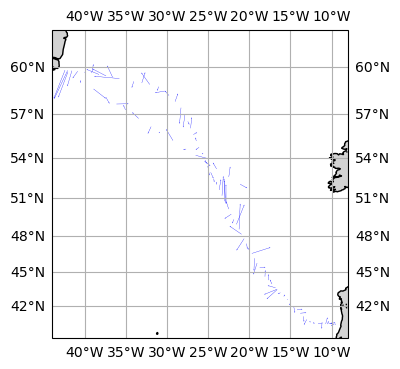

In [3]:

xsadcp.vectors_plot(ds, bathy, 
                    xsadcp.get_range(ds.LONGITUDE), 
                    xsadcp.get_range(ds.LATITUDE),
                    xsadcp.get_range(ds.PROFZ),
                    xsadcp.get_range(ds.PROFZ),
                    xsadcp.get_range(ds.PROFZ),
                 scale_factor=0.5, sample=100,
                 depth_2_checkbox=False, depth_3_checkbox=False, bathy_checkbox=False)

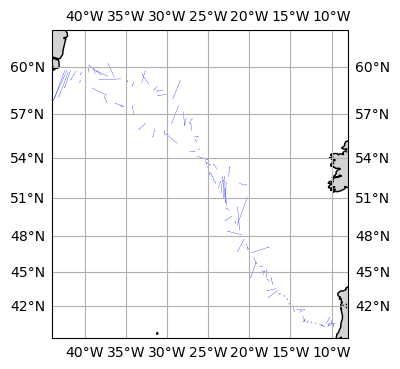

In [4]:
xsadcp.vectors_plot(ds_origine.swap_dims({"MAXT":"TIME"}), bathy, 
                    xsadcp.get_range(ds.LONGITUDE), 
                    xsadcp.get_range(ds.LATITUDE),
                    xsadcp.get_range(ds.PROFZ),
                    xsadcp.get_range(ds.PROFZ),
                    xsadcp.get_range(ds.PROFZ),
                 scale_factor=0.5, sample=100,
                 depth_2_checkbox=False, depth_3_checkbox=False, bathy_checkbox=False)

In [5]:
import hvplot.xarray
(xsadcp.bathy_uship_vship_bottom_depth(ds)[0]
 *xsadcp.bathy_uship_vship_bottom_depth(ds_origine)[0])

:Overlay
   .Curve.I  :Curve   [TIME]   (BATHY)
   .Curve.II :Curve   [TIME]   (BATHY)

In [6]:
(ds.UCUR.hvplot.contour(x='TIME',y='PROFZ',width=350)
 +ds.VCUR.hvplot.contour(x='TIME',y='PROFZ',width=350)
)


:Layout
   .Contours.I  :Contours   [TIME,PROFZ]   (UCUR)
   .Contours.II :Contours   [TIME,PROFZ]   (VCUR)

## Problem of metadata in new formats? 
usage in the SADCP_VIWER app (table)
TODO: there are some values which are doubled in the table???
take them out from original table?

In [2]:
file_names=xsadcp.get_file_names()

In [3]:
df = xsadcp.load_csv()
xsadcp.filter_df(df, file_names[0])

(                                      11
 shipname                        Thalassa
 date_start                    2018-06-14
 date_start                    2018-06-14
 adcp_frequency(KiloHz)              1500
 bin_length(meter)                     80
 year                                2018
 LOCAL_CDI_ID            SADCP_18000510_3,
                                                                        11
 file_name                          18000510_3_OVIDE2018_THALASSA_OS150.nc
 filename                           18000510_3_OVIDE2018_THALASSA_OS150.nc
 shipname                                                         Thalassa
 date_start                                                     2018-06-14
 date_end                                                       2018-07-13
 adcp_frequency(KiloHz)                                               1500
 bin_length(meter)                                                      80
 year                                                          

In [4]:
selected_file=file_names[0]
#xsadcp.filter_df(df, file)
(df[df["file_name"] == selected_file][[
                    "shipname",
                    "date_start",
                    "date_end",
                    "adcp_frequency(KiloHz)",
                    "bin_length(meter)",
                    "year",
                    "LOCAL_CDI_ID",
                ]]
            ).transpose()
    # include

,11
shipname,Thalassa
date_start,2018-06-14
date_end,2018-07-13
adcp_frequency(KiloHz),1500
bin_length(meter),80
year,2018
LOCAL_CDI_ID,SADCP_18000510_3


## **Some problematic files**

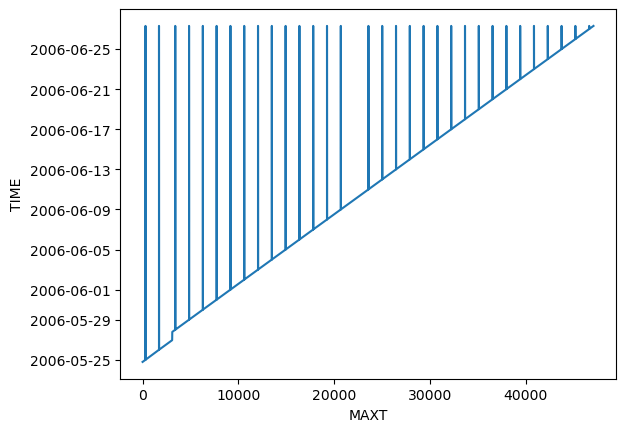

In [15]:
file_name=file_names[-2]##
file_name='6530010_3_OVIDE2006_NB75_modif1_SDN.nc'
xr.open_dataset('./transformed_netCDF/'+file_name).TIME.plot()#.resample(TIME="1h")